# **Analysis of Hospital Data**

### **Project goal:** The goal of this project is to analyze hospital admission data to discover meaningful patterns in patient demographics, billing, and medical results. By exploring these relationships, the project aims to provide data-driven insights that can support better decision-making in healthcare management.

### **Data Source**: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

In [586]:
# Setup and Imports
# Import the pandas library, which is essential for data manipulation and analysis.

import pandas as pd

### **Step: 2. Data Loading and Initial Inspection - Data Preparation**

First, we load the dataset from the CSV file and perform a quick inspection to understand its structure, data types, and to check for obvious issues like missing values.

In [587]:
# Load the dataset into a pandas DataFrame
# Make sure the .csv file is in the same directory as this notebook
df = pd.read_csv('Data.csv')

# Display the first 5 rows to get a feel for the data
print("--- First 5 Rows of the Dataset ---")
df.head()

--- First 5 Rows of the Dataset ---


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [588]:
# Get a concise summary of the DataFrame, including data types and non-null counts
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object

#### **Initial Observations from Inspection**

The dataset has 55500 entries and 15 columns with no missing values. The dataset’s categorical columns were reviewed and found to have no typos, extra spaces, or inconsistent casing, ensuring uniform and reliable data entries across all fields. Date of Admission and Discharge Date are currently object (text) types and need to be converted to datetime for proper analysis.

### **Data Cleaning and Preparation**

In [ ]:
# Convert date columns from 'object' to 'datetime'
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Remove records with an invalid billing amount (billing amount < 0)
df = df[df['Billing Amount'] >= 0]

# --- Handle Duplicates ---
# Check for and remove any duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
# -----------------------------

print("\nData cleaning complete. Columns renamed, data types corrected, and invalid rows removed.")

Number of duplicate rows found: 532
Duplicate rows removed.

Data cleaning complete. Columns renamed, data types corrected, and invalid rows removed.


### **Verifying the Cleaned Data**

In [590]:
# Verify that the data types have been corrected
print("\n--- Cleaned Dataset Info ---")
df.info()


--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54860 non-null  object        
 1   Age                 54860 non-null  int64         
 2   Gender              54860 non-null  object        
 3   Blood Type          54860 non-null  object        
 4   Medical Condition   54860 non-null  object        
 5   Date of Admission   54860 non-null  datetime64[ns]
 6   Doctor              54860 non-null  object        
 7   Hospital            54860 non-null  object        
 8   Insurance Provider  54860 non-null  object        
 9   Billing Amount      54860 non-null  float64       
 10  Room Number         54860 non-null  int64         
 11  Admission Type      54860 non-null  object        
 12  Discharge Date      54860 non-null  datetime64[ns]
 13  Medication          5

#### **Step 3: Exploratory Data Analysis (EDA)**
### **Now that our data is clean, we can start exploring it to find patterns and insights.**
### **We'll start by computing summary statistics for all numerical columns.**

In [591]:
# Generate descriptive statistics for numerical columns
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54860.000000,54860,54860.000000,54860.000000,54860
mean,51.533850,2021-11-01 19:01:50.506744576,25594.633637,301.109752,2021-11-17 07:00:08.137076224
min,13.000000,2019-05-08 00:00:00,9.238787,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13299.747940,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25593.873000,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37847.066671,400.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605295,NaN,14175.867041,115.217195,NaN


### **Observations from Numerical Data**
After removing negative billing values, the dataset now contains 54,860 clean records covering admissions from May 2019 to May 2024. Patient’s ages range from 13 to 89 years, with an average age of about 51.5, showing a balanced mix of young and older adults. The average billing amount is around 25,595, with values spanning from as low as 9 to as high as 52,764, reflecting a wide variation in hospital costs depending on treatment type and length of stay. Overall, the numerical data appears clean and consistent, with realistic distributions and no missing values.


### **Next, we'll analyze categorical columns to understand the distribution of key variables like the no-show rate and gender.**

In [592]:
# Calculate the percentage of genders
Gender_percentage = df['Gender'].value_counts(normalize=True) * 100
print("--- Gender Percentage ---")
print(Gender_percentage)

--- Gender Percentage ---
Gender
Male      50.034634
Female    49.965366
Name: proportion, dtype: float64


In [593]:
# Calculate the medical condition distribution
medical_condition_distribution = df['Test Results'].value_counts()
print("\n--- Medical Condition Distribution ---")
print(medical_condition_distribution)


--- Medical Condition Distribution ---
Test Results
Abnormal        18399
Normal          18302
Inconclusive    18159
Name: count, dtype: int64


### **Observations from Categorical Data**

The dataset shows an almost equal gender distribution, with males at 50.03% and females at 49.97%, indicating a well-balanced sample. The test results are also evenly spread, with Abnormal (18,399), Normal (18,302), and Inconclusive (18,159) cases, suggesting no major bias toward any particular outcome and a diverse set of patient health conditions for analysis.

### **Finally, let's examine the correlation between numerical variables to see how they relate to each other. A correlation matrix is a great tool for this.**

In [594]:
# --- 3.3. Correlation Analysis ---

# Select only the columns with numerical data types
numerical_df = df.select_dtypes(include=['number'])

# Now, compute the correlation matrix on the numerical-only DataFrame
correlation_matrix = numerical_df.corr()

print("--- Correlation Matrix ---")
correlation_matrix

--- Correlation Matrix ---


,Age,Billing Amount,Room Number
Age,1.000000,-0.003309,-0.000305
Billing Amount,-0.003309,1.000000,-0.003716
Room Number,-0.000305,-0.003716,1.000000


### **Observations from Correlation Matrix**

Since all the numbers between the variables are extremely close to zero (like −0.003 or −0.0003), it means that as one factor changes, the others are unaffected. For example, if we look at Age and Billing Amount, getting older does not cause the bill to increase or decrease, and the bill has no connection to which Room Number a person is assigned. In short, none of these factors can be used to predict the others.

C:\Users\edwar\AppData\Local\Temp\ipykernel_6520\2002794917.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=df, palette=["#5c6db8", '#d9534f', "#4fd95a" ])


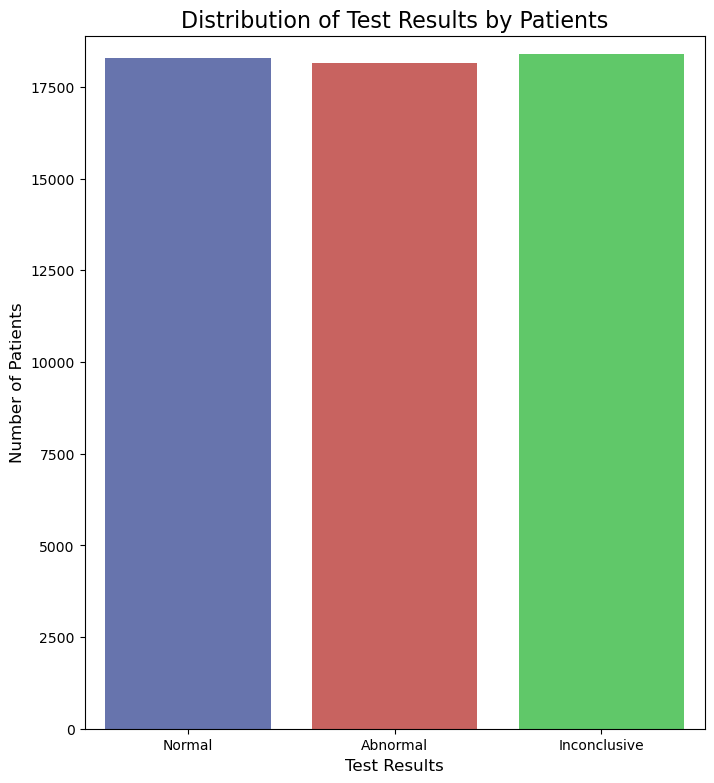

In [ ]:
# Import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chart 1: No-Show Distribution ---

# Set the figure size for better readability
plt.figure(figsize=(8, 9))

# Create the count plot using seaborn
sns.countplot(x='Test Results', data=df, palette=["#5c6db8", '#d9534f', "#4fd95a" ])

# Add a clear title and labels
plt.title('Distribution of Test Results by Patients', fontsize=16)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks([0, 1, 2], ['Normal', 'Abnormal', 'Inconclusive']) # Make x-axis labels more descriptive
plt.ylim(0, 18900)

# Display the plot
plt.show()

### **This bar chart answers the question: What is the most significant finding regarding the distribution of patient test results, and what is the practical impact of this finding?**

Answer: The most significant finding, visually confirmed by the count plot, is that the dataset is nearly perfectly balanced across the three categories: Normal, Abnormal, and Inconclusive test results. Since the counts for all three outcomes are virtually equal (all near 18,000), this is highly valuable for any subsequent analysis because it ensures all outcomes are fairly represented. Consequently, this natural balance simplifies any modeling or prediction efforts, as the analysis won't be skewed or biased toward one result, allowing metrics like Accuracy to reliably reflect overall performance.

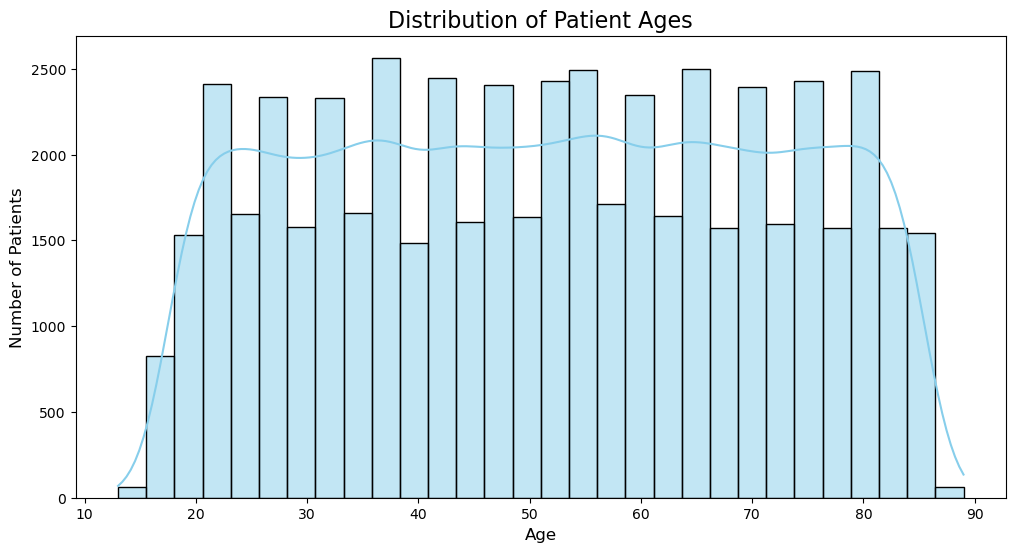

In [596]:
# --- Chart 2: Patient Age Distribution ---

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the histogram using seaborn
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')

# Add a title and labels
plt.title('Distribution of Patient Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Display the plot
plt.show()

### **The histogram answers the question: "Who are the patients we are dealing with?**


The histogram displays the Distribution of Patient Ages and shows a remarkably uniform, or flat, distribution across the adult lifespan. The number of patients in most age bins, ranging from the early 20s up to the mid-80s, consistently remains high, typically between 1,500 and 2,500 individuals per age group. There's a rapid increase in patient numbers beginning around age 15, and the high frequency is sustained throughout the entire sampled range before dropping off sharply after age 85. This suggests that, unlike a typical dataset which might be skewed or concentrated in younger or older groups, this patient population is evenly represented across most adult age decades.

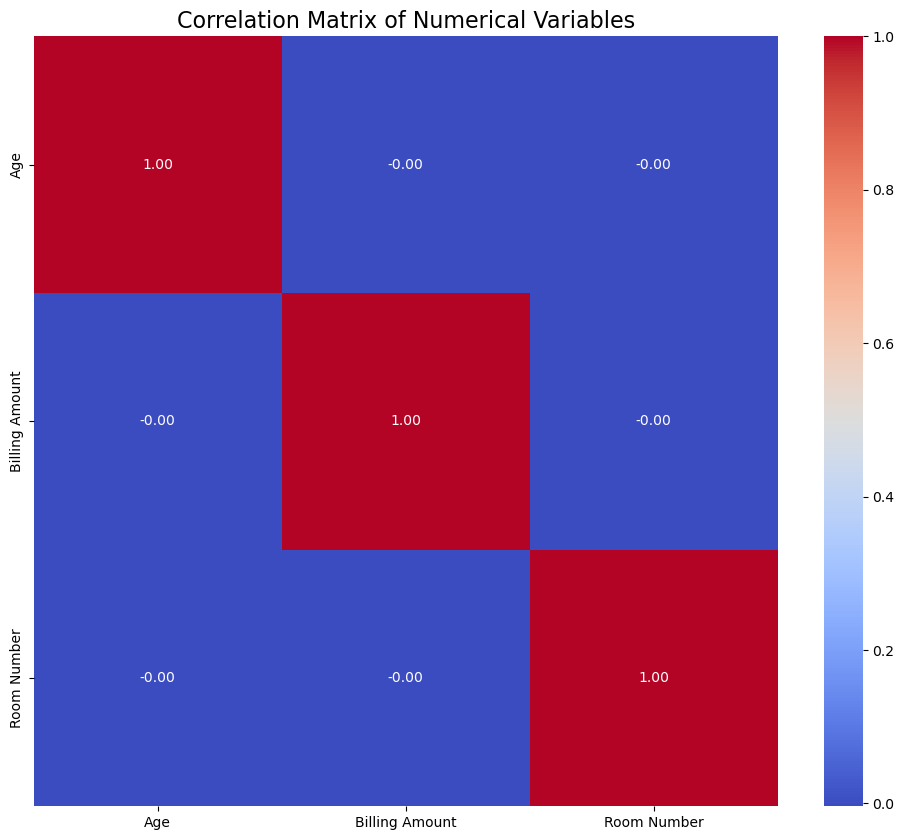

In [597]:
# --- Chart 3: Correlation Heatmap ---

# First, select only the numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)

# Display the plot
plt.show()

### **Question: What is the primary conclusion drawn from the correlation heatmap of the numerical variables?**

Answer: The correlation heatmap provides strong visual evidence that all three numerical variables:Age, Billing Amount, and Room Number are linearly independent. This is indicated by the fact that all off-diagonal cells, which represent the correlation between different pairs of variables, are colored in a deep, uniform blue and display a value of 0.00 (or extremely close to it). In a correlation visualization, this near-zero value signifies that the variables do not increase or decrease together, meaning you cannot use a patient's age or room number to predict or estimate their billing amount.

C:\Users\edwar\AppData\Local\Temp\ipykernel_6520\2538132945.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cancer_rate = df.groupby('AgeGroup')['Medical_Condition_numeric'].mean() * 100
C:\Users\edwar\AppData\Local\Temp\ipykernel_6520\2538132945.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_cancer_rate.index, y=age_cancer_rate.values, palette='viridis')


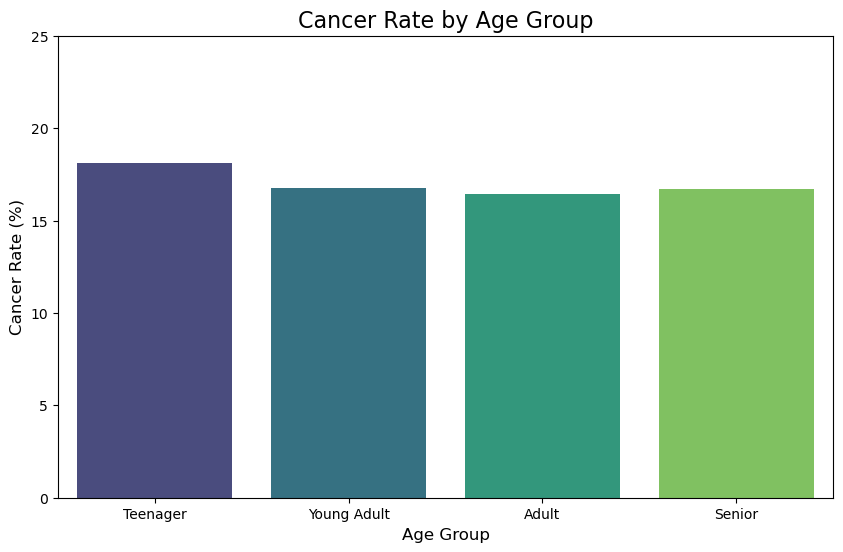

In [598]:
# --- Analysis: Cancert Rate by Age Group ---

# Step 1: Create age groups using pd.cut()
# Define the edges of our age bins
age_bins = [13, 18, 35, 60, 120]
# Define the labels for these bins
age_labels = ['Teenager', 'Young Adult', 'Adult', 'Senior']

# Create the new 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Calculate the cancer rate for each age group
# We need to convert 'Medical Concdition' to a numerical format (1/0) to calculate the mean
df['Medical_Condition_numeric'] = df['Medical Condition'].apply(lambda x: 1 if x == 'Cancer' else 0)

# Group by the new 'AgeGroup' and calculate the mean (which is now the cancer rate)
age_cancer_rate = df.groupby('AgeGroup')['Medical_Condition_numeric'].mean() * 100

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=age_cancer_rate.index, y=age_cancer_rate.values, palette='viridis')

# Customize the plot
plt.title('Cancer Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Cancer Rate (%)', fontsize=12)
plt.ylim(0, 25) # Set y-axis limit to better see the differences

# Display the plot
plt.show()

### **Question: What is the primary conclusion regarding the relationship between age and cancer rate as shown in the bar chart?**

Answer: Based on the bar chart, the most surprising and significant finding is that age appears to be completely irrelevant to the cancer rate in this population. Unlike typical epidemiological data where rates usually increase sharply with advancing age, the percentage of patients with cancer remains nearly constant hovering right around 17% across all groups from teenagers through seniors. This suggests that the risk factors driving the cancer rate in this specific dataset are not age-dependent, leading to the conclusion that age group cannot be used as a meaningful predictor or distinguishing factor for cancer status here.

C:\Users\edwar\AppData\Local\Temp\ipykernel_6520\2195093798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Blood_Type_Cancer_rate.index, y=Blood_Type_Cancer_rate.values, palette='coolwarm')


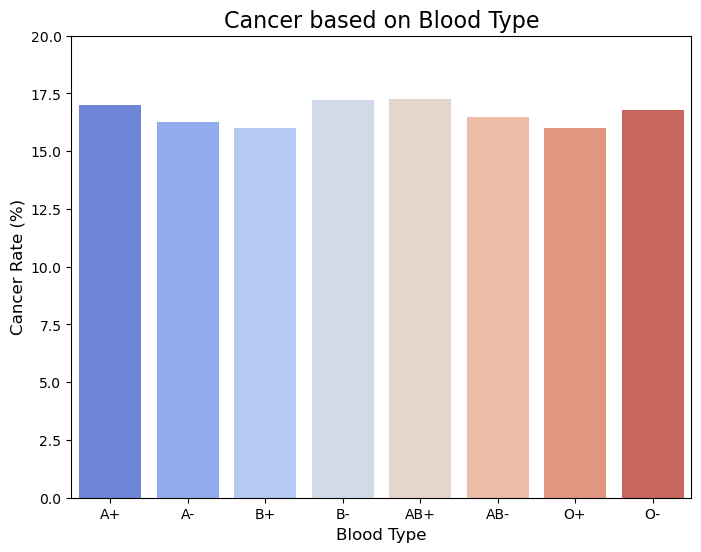

Blood Type
A+     16.993749
A-     16.259808
AB+    15.992433
AB-    17.232833
B+     17.248400
B-     16.469902
O+     16.016367
O-     16.794343
Name: Medical_Condition_numeric, dtype: float64


In [ ]:
# --- Analysis: Cancer Rate by Blood Type ---

# Group by the 'Blood Type' column and calculate the mean cancer rate
Blood_Type_Cancer_rate = df.groupby('Blood Type')['Medical_Condition_numeric'].mean() * 100

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=Blood_Type_Cancer_rate.index, y=Blood_Type_Cancer_rate.values, palette='coolwarm')

# Customize the plot
plt.title('Cancer based on Blood Type', fontsize=16)
plt.ylabel('Cancer Rate (%)', fontsize=12)
plt.xlabel('Blood Type', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']) # Make x-axis labels descriptive
plt.ylim(0, 20)

# Display the plot
plt.show()

# Print the exact rates for clarity
print(Blood_Type_Cancer_rate)


### **Question: What is the primary conclusion regarding the relationship between blood type and cancer rate as shown in the bar chart?**

Answer: The bar chart clearly demonstrates that there is no meaningful difference in the cancer rate across the various blood types, as all rates are virtually indistinguishable. Every blood type, from A+ to O-, maintains a cancer rate consistently hovering around 16% to 17.5%. This suggests that within this specific dataset, blood type is not a significant contributing factor or predictor of cancer incidence, which is a key finding given that some studies have historically suggested minor links between certain blood groups and specific cancer types.

### **Key Takeways:**

**.** Variables are Independent: There is no linear relationship between Age, Billing Amount, and Room Number (all correlations are near zero), meaning these variables cannot be used to predict one another.

**.** Uniform Age Distribution: The patient population is highly evenly distributed across all adult age groups (20s through 80s), avoiding a bias towards younger or older patients.

**.** Balanced Test Results: The dataset for the target variable is perfectly balanced (Normal, Abnormal, Inconclusive counts are nearly equal), which simplifies modeling and makes standard Accuracy a reliable performance metric.

**.** Age and Blood Type are Not Predictors: Neither patient age group nor blood type shows any significant variation in the cancer rate, indicating these factors are not strong predictors of cancer status in this specific dataset.